In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Extracting the data from loan.csv file and storing it in a data frame

In [2]:
data = pd.read_csv('loan.csv')

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
### Checking the shape of data frame
data.shape

(39717, 111)

## Data Cleaning

In [5]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### As you can see there are lot of null values in most of the columns. Let's remove them

In [6]:
data.dropna(axis=1,how='all',inplace=True)

In [7]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
data.shape

(39717, 57)

In [9]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

### Removing the columns which have just one type of values

In [10]:
data.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','application_type','tax_liens','delinq_amnt'],axis=1,inplace=True)

In [11]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


### There are 49 columns and some columns in these are not required as they are either irrelevant or features which are useful after the loan is aprroved.
- We require only features where it gives the information required before approval of loan.
- "id", "member_id", "emp_title","url","desc","title","zip_code" are some columns which are irrelevant and does not produce any useful information for loan defaulting.
- 'desc' column has description data which is string and not useful, Hence removing the column.
- There are columns like "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp","total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d","last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record" which produces information regarding post approved features which are not relevant to our analysis.
- In "pub_rec_bankruptcies" most of the values are 0 and would not be helpful in our analysis and hence removing it.
### List of columns that are being removed

- id 
- member_id 
- url
- title
- emp_title
- zip_code
- last_credit_pull_d
- desc
- out_prncp_inv
- total_pymnt_inv
- funded_amnt
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record
- pub_rec_bankruptcies

In [12]:
data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record","pub_rec_bankruptcies"], axis = 1, inplace = True)
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,OR,17.94,Jan-96,0,15,0,53.90%,38


In [13]:
data.shape

(39717, 22)

### These are the columns which will be helpful for our analysis.

In [14]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

### Let's check if the columns or rows have any missing values

In [15]:
(data.isna().sum()/len(data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

### Here we have two columns which have null values.
- emp_length
- revol_util

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

- <font color = blue>Let us consider "emp_length" column which is a categorical column. Since it's a categorical column we can replace the missing values with the highest frequent values or mode.</font>

In [17]:
data['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [18]:
data['emp_length'].mode()

0    10+ years
dtype: object

- <font color = blue> Since the column has only 2 percent of missing values, replacing the values with mode would not affect our analysis  </font>

In [19]:
data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)

- <font color = blue> Now let us consider "revol_util" column  which has only 0.1 percent of missing values. Since the missing values percentage is too less, we can drop the values.  </font>

In [20]:
data.dropna(subset =['revol_util'],axis=0,inplace=True)

In [21]:
data.isna().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

In [22]:
data.shape

(39667, 22)

### Standerdizing the values

- <font color = blue> "term" column is in months which we can covert it into years.</font>

In [23]:
data['term'] = data['term'].apply(lambda x : str(int(x.split('months')[0])/12).split('.')[0]) + ' years'

- <font color = blue> "int_rate" column contains continous values which means that type should be float.</font>

In [24]:
data['int_rate'] = data['int_rate'].apply(lambda x : float(x[:-1]) )

- <font color = blue> Similarly "revol_util" also has continous values and should be treated same as above.</font>

In [25]:
 data['revol_util'] = data['revol_util'].apply(lambda x : float(x[:-1]) )

- <font color = blue> "emp_length" column has unwanted values like '<' and '+' which should be removed. Here we can consider 0 for less than one year employment(< 1 year) and for 10+ years we can consider as 10 years which drastically does not affect our analysis.</font>

In [26]:
data.emp_length.value_counts()

10+ years    9950
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: emp_length, dtype: int64

In [27]:
data['emp_length'] = data['emp_length'].apply(lambda x : '0' if x[0] in '<' else ('10 years' if x[2] in '+' else x) )

In [28]:
data.home_ownership.value_counts()

RENT        18867
MORTGAGE    17648
OWN          3053
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

- <font color = blue> "home_ownership" has 3 NONE values which we will be replacing with OTHER.</font>

In [29]:
data.home_ownership.replace(to_replace=['NONE'],value='OTHER',inplace=True)

In [30]:
data.home_ownership.value_counts()

RENT        18867
MORTGAGE    17648
OWN          3053
OTHER          99
Name: home_ownership, dtype: int64

In [31]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,3 years,10.65,162.87,B,B2,10 years,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,5 years,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,3 years,15.96,84.33,C,C5,10 years,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,3 years,13.49,339.31,C,C1,10 years,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21.0,37
4,3000,3000.0,5 years,12.69,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,OR,17.94,Jan-96,0,15,0,53.9,38


In [32]:
data['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Current         1140
Name: loan_status, dtype: int64

### Filtering Unwanted Data or Rows

- <font color = blue> Since our analysis is based on who are likely to default, "Current" loan members data are not required and  we can analyse more precisely from "Fully Paid" and "Charged Off" loan members.</font>

In [33]:
data = data[~(data['loan_status'] == 'Current')]

In [34]:
data['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

In [35]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,3 years,10.65,162.87,B,B2,10 years,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,5 years,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,3 years,15.96,84.33,C,C5,10 years,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,3 years,13.49,339.31,C,C1,10 years,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,3 years,7.90,156.46,A,A4,3 years,RENT,36000.0,...,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,28.3,12


In [36]:
data.shape

(38527, 22)

### Removing Outliers
#### Let's analyze the numerical continous variables which might have some outliers.
- loan_amnt
- funded_amnt_inv
- annual_inc
-   dti 

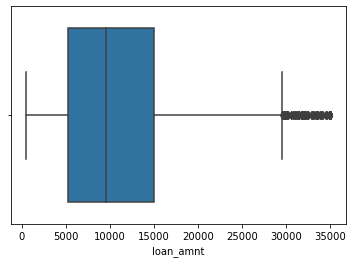

In [37]:
sns.boxplot(data['loan_amnt'])
plt.show()

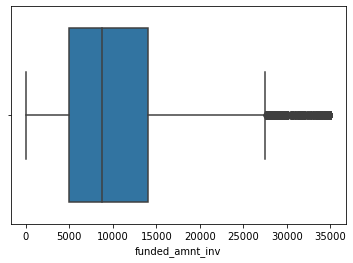

In [38]:
sns.boxplot(data['funded_amnt_inv'])
plt.show()

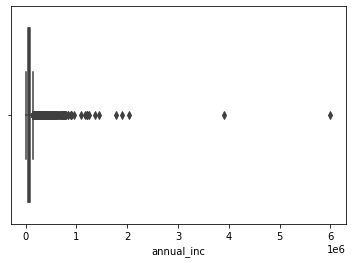

In [39]:
sns.boxplot(data['annual_inc'])
plt.show()

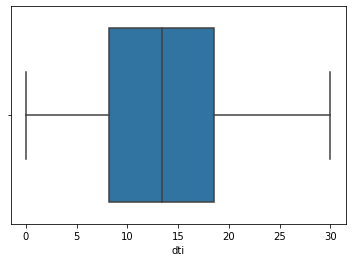

In [40]:
sns.boxplot(data['dti'])
plt.show()

- <font color = blue> Except "dti" all other columns have outliers.For the "annual_inc" there might be possibility of outliers at both fences. So let's remove the outliers using IQR(Inter Quartile range) </font>

In [41]:
columns = ['loan_amnt','funded_amnt_inv','annual_inc']

The Inter Quartile range for loan_amnt is 
9675.0
The outliers range for loan_amnt is 
29512.5


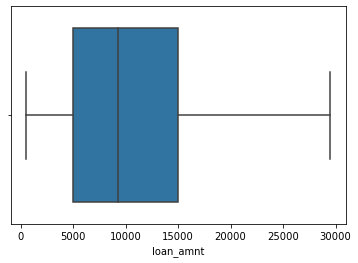

The Inter Quartile range for funded_amnt_inv is 
8417.73478675
The outliers range for funded_amnt_inv is 
26041.677860124997


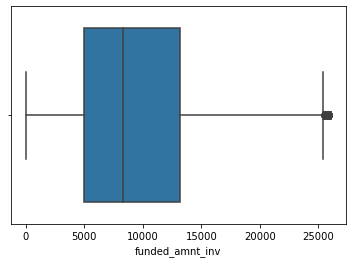

The Inter Quartile range for annual_inc is 
40000.0
The outliers range for annual_inc is 
140000.0


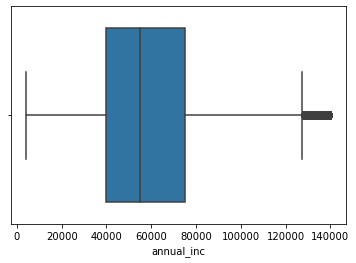

In [42]:
for col in columns:
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    print('The Inter Quartile range for {} is \n{}'.format(col,IQR))
    outliers_range = data[col].quantile(0.75) + (1.5*IQR)
    print('The outliers range for {} is \n{}'.format(col,outliers_range))
    data = data[data[col] <= outliers_range]
    sns.boxplot(data[col])
    plt.show()

#### Let us look at the data and columns we have once again.

In [43]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,3 years,10.65,162.87,B,B2,10 years,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,5 years,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,3 years,15.96,84.33,C,C5,10 years,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,3 years,13.49,339.31,C,C1,10 years,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,3 years,7.90,156.46,A,A4,3 years,RENT,36000.0,...,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,28.3,12


In [44]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

## Univariate Analysis

#### First let us analyze the categorical variables.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

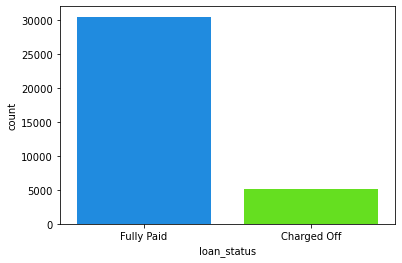

In [185]:
sns.countplot(x = 'loan_status', data = data,palette = 'gist_rainbow_r')

In [191]:
round(len(data[data['loan_status'] == 'Charged Off'])/len(data)*100,2)

14.5

#### We can observe from the above plot, 14.5% of the applicants are defaulters.

#### Here we only need Defaulter's data so we will be filtering the data.

<AxesSubplot:xlabel='term', ylabel='count'>

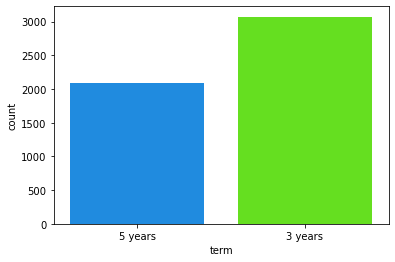

In [45]:
sns.countplot(x = 'term', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> From above analysis we can observe that applicants whose term is 3 years or 36 months to be precise are defaulters</font>

<AxesSubplot:xlabel='grade', ylabel='count'>

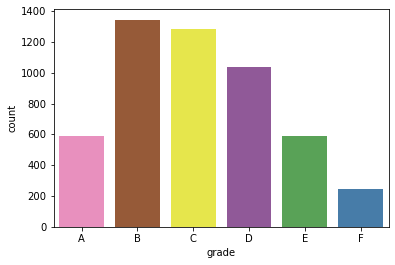

In [46]:
sns.countplot(x = 'grade', data = data[data['loan_status'] == 'Charged Off'],palette = 'Set1_r', order = ['A','B','C','D','E','F'])

- <font color = blue> From above analysis we can observe that Most of the defaulters are applicants of grade 'B'</font>

- Since we have "grade" column we can consider the "sub_grade" in the format of 1 instead of A1 

In [47]:
data['sub_grade'] = data['sub_grade'].apply(lambda x : x[1])

<AxesSubplot:xlabel='grade', ylabel='count'>

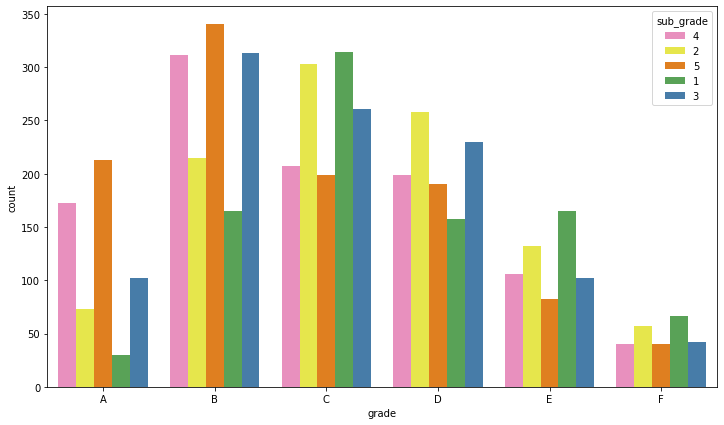

In [50]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'grade', data = data[data['loan_status'] == 'Charged Off'],hue = 'sub_grade',palette = 'Set1_r', order = ['A','B','C','D','E','F'])

- <font color = blue> As we know that Grade B applicants are the most in defaulters. By the above observation in Grade 'B', sub grade 'B5' applicants are the most in defaulters </font>

<AxesSubplot:xlabel='emp_length', ylabel='count'>

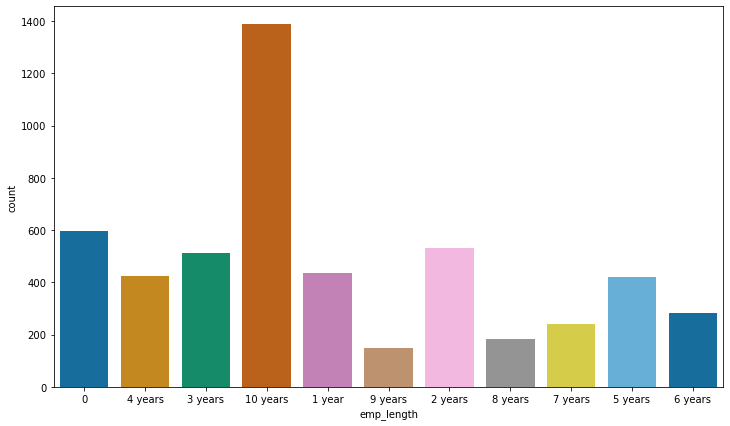

In [49]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'emp_length', data = data[data['loan_status'] == 'Charged Off'],palette = 'colorblind')

- <font color = blue> Applicants of Employment length 10 or more years are the most in defaulters.  </font>

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

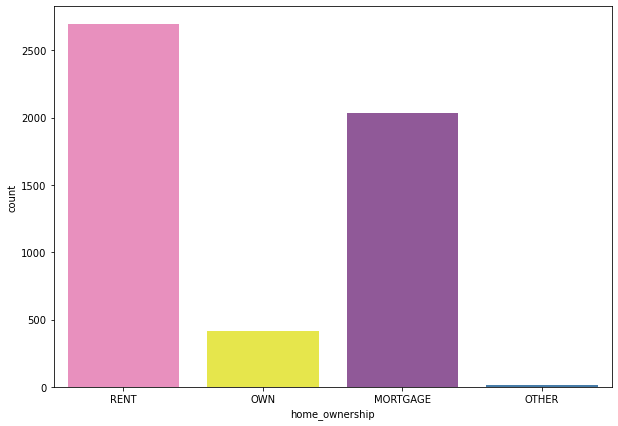

In [51]:
plt.figure(figsize=[10,7])
sns.countplot(x = 'home_ownership', data = data[data['loan_status'] == 'Charged Off'],palette = 'Set1_r')

- <font color = blue> Applicants staying in Rented(RENT) houses are the most in defaulters.  </font>

<AxesSubplot:xlabel='verification_status', ylabel='count'>

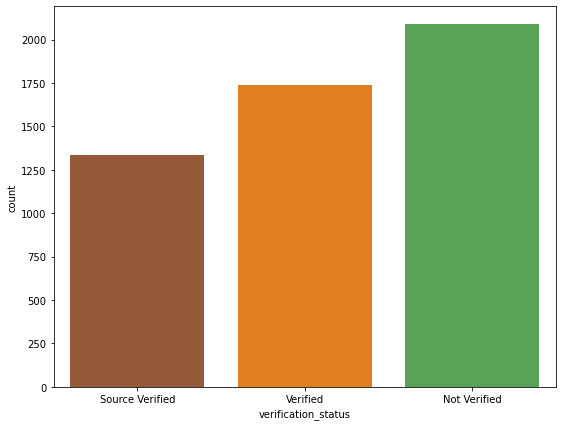

In [52]:
plt.figure(figsize=[9,7])
sns.countplot(x = 'verification_status', data = data[data['loan_status'] == 'Charged Off'],palette = 'Set1_r')

- <font color = blue> Here as expected, Applicants who are 'Not verified' are the most in defaulters.  </font>


<AxesSubplot:xlabel='count', ylabel='purpose'>

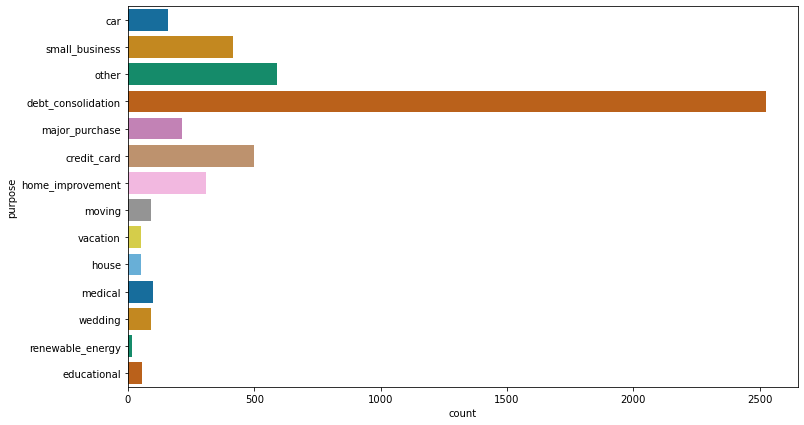

In [53]:
plt.figure(figsize=[12,7])
sns.countplot(y = 'purpose', data = data[data['loan_status'] == 'Charged Off'],palette = 'colorblind')

- <font color = blue> Applicants who's purpose of taking the loan is 'debt consolidation' are the most in defaulters.  </font>


<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

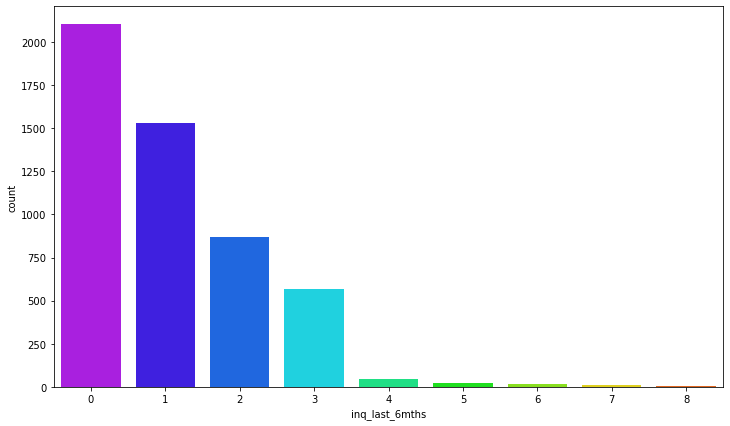

In [54]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'inq_last_6mths', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> Applicants who number of inquiries are 0 are the most in defaulters.  </font>


<AxesSubplot:xlabel='pub_rec', ylabel='count'>

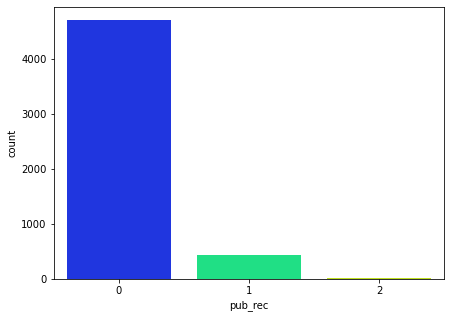

In [55]:
plt.figure(figsize=[7,5])
sns.countplot(x = 'pub_rec', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> Applicants who's number of public records are 0 are the most in defaulters.  </font>

<AxesSubplot:xlabel='count', ylabel='addr_state'>

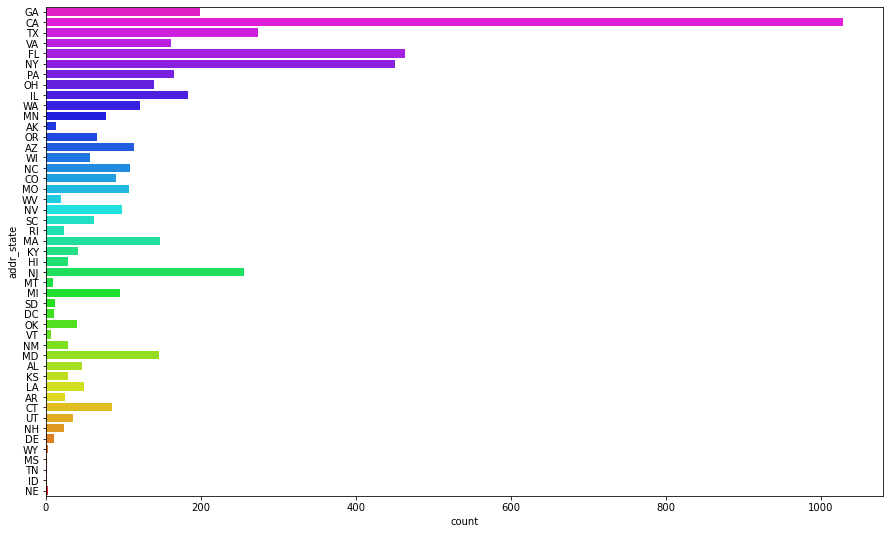

In [58]:
plt.figure(figsize=[15,9])
sns.countplot(y = 'addr_state', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> Applicants who are from state 'CA' are the most in defaulters.  </font>

## Segmented Univariate Analysis

#### There are few numerical variables wich we need to analyze. So for analysis we would grouping the values to certain categories 

In [59]:
data['loan_amnt_cat'] = pd.cut(data['loan_amnt'], bins=6,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])
data['funded_amnt_inv_cat'] = pd.cut(data['funded_amnt_inv'], bins=6,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])
data['int_rate_cat'] = pd.cut(data['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
data['open_acc_cat'] = pd.cut(data['open_acc'],bins = 9,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45'])
data['revol_util_cat'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data['total_acc_cat'] = pd.cut(data['total_acc'], bins=9,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])
data['annual_inc_cat'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
data['installment_cat'] = pd.cut(data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
data['dti_cat'] = pd.cut(data['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [60]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,loan_amnt_cat,funded_amnt_inv_cat,int_rate_cat,open_acc_cat,revol_util_cat,total_acc_cat,annual_inc_cat,installment_cat,dti_cat
0,5000,4975.0,3 years,10.65,162.87,B,2,10 years,RENT,24000.0,...,9,0-5k,5k-10k,10%-15%,0-5,80-100,0-10,3k-31k,145-274,25-30
1,2500,2500.0,5 years,15.27,59.83,C,4,0,RENT,30000.0,...,4,0-5k,0-5k,15%-20%,0-5,0-20,0-10,3k-31k,14-145,0-5
2,2400,2400.0,3 years,15.96,84.33,C,5,10 years,RENT,12252.0,...,10,0-5k,0-5k,15%-20%,0-5,80-100,0-10,3k-31k,14-145,5-10
3,10000,10000.0,3 years,13.49,339.31,C,1,10 years,RENT,49200.0,...,37,5k-10k,10k-15k,10%-15%,5-10,20-40,30-40,31k-58k,403-531,20-25
5,5000,5000.0,3 years,7.90,156.46,A,4,3 years,RENT,36000.0,...,12,0-5k,5k-10k,5%-10%,5-10,20-40,10-20,31k-58k,145-274,10-15


<AxesSubplot:xlabel='loan_amnt_cat', ylabel='count'>

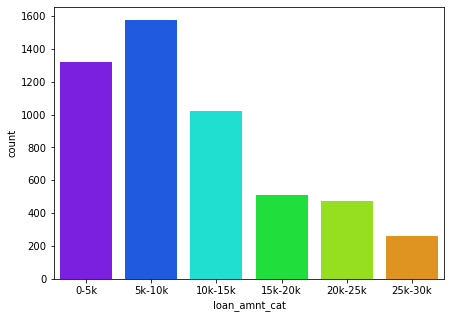

In [61]:
plt.figure(figsize=[7,5])
sns.countplot(x = 'loan_amnt_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> Applicants who's loan amount is between 5000-10000 are most in defaulters.  </font>

<AxesSubplot:xlabel='funded_amnt_inv_cat', ylabel='count'>

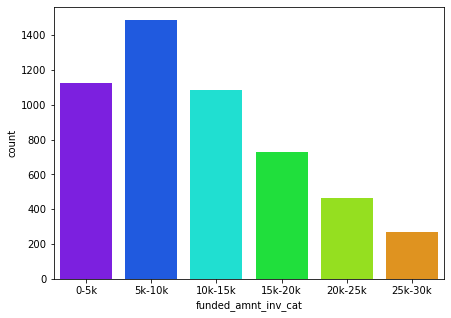

In [62]:
plt.figure(figsize=[7,5])
sns.countplot(x = 'funded_amnt_inv_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> When funded amount by investor is between 5000-10000 most defaulters are found.  </font>

<AxesSubplot:xlabel='int_rate_cat', ylabel='count'>

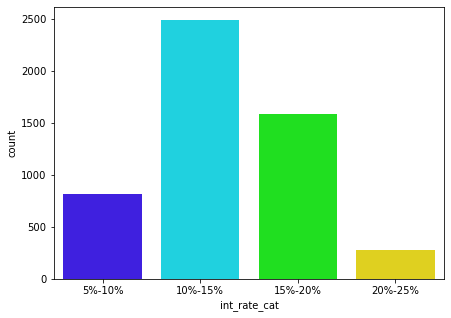

In [63]:
plt.figure(figsize=[7,5])
sns.countplot(x = 'int_rate_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> When interest rate is between 10-15% most defaulters are found.  </font>

<AxesSubplot:xlabel='open_acc_cat', ylabel='count'>

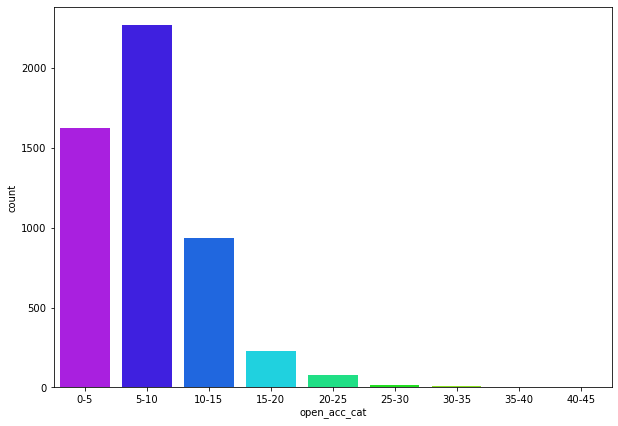

In [64]:
plt.figure(figsize=[10,7])
sns.countplot(x = 'open_acc_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> When  number of open credit lines in the borrower's credit file is between 5-10 most defaulters are found.  </font>

<AxesSubplot:xlabel='revol_util_cat', ylabel='count'>

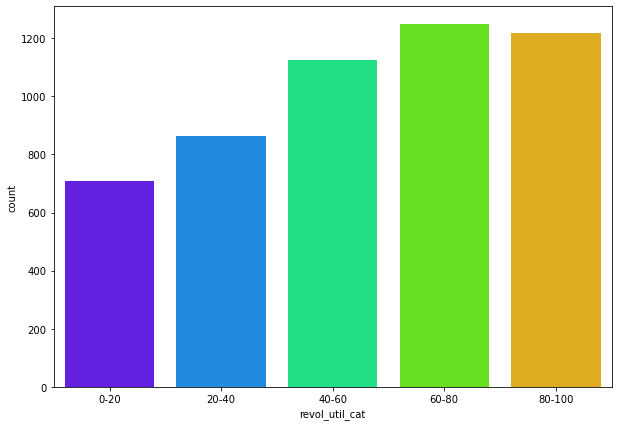

In [65]:
plt.figure(figsize=[10,7])
sns.countplot(x = 'revol_util_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> When Revolving line utilization rate is between 60-80 most defaulters are found.  </font>

<AxesSubplot:xlabel='total_acc_cat', ylabel='count'>

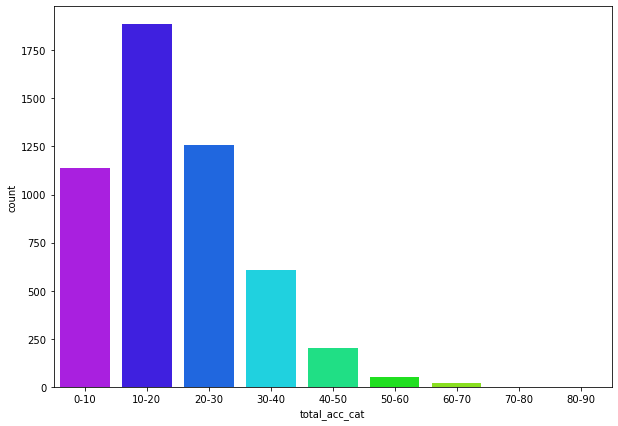

In [66]:
plt.figure(figsize=[10,7])
sns.countplot(x = 'total_acc_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> When  total number of credit lines is between 10-20 most defaulters are found.  </font>

<AxesSubplot:xlabel='annual_inc_cat', ylabel='count'>

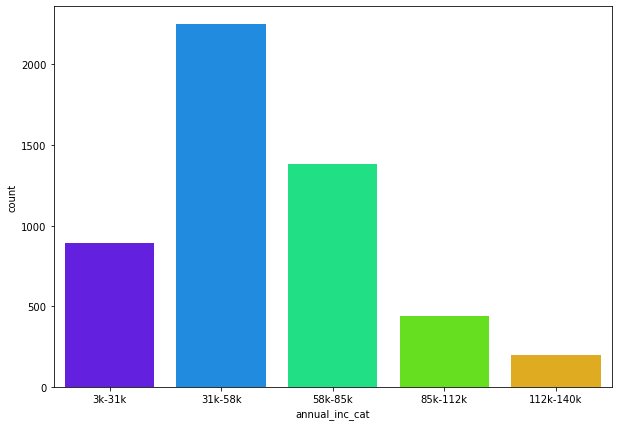

In [67]:
plt.figure(figsize=[10,7])
sns.countplot(x = 'annual_inc_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> When annual income of applicants are between 31000-58000 most defaulters are found.  </font>

<AxesSubplot:xlabel='installment_cat', ylabel='count'>

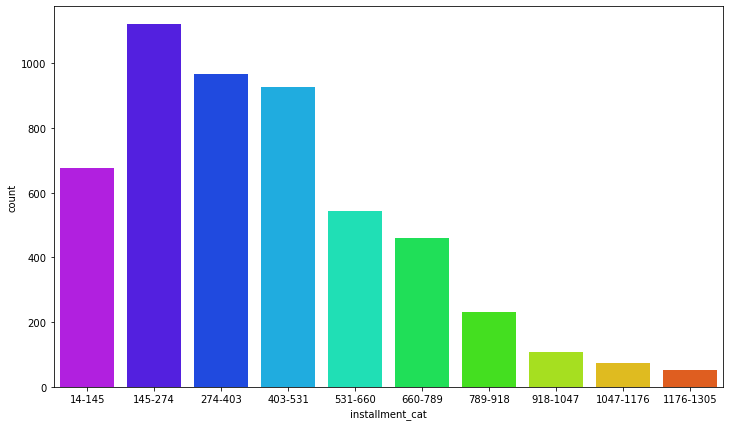

In [68]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'installment_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> When installments are between 145-274 most defaulters are found.  </font>

<AxesSubplot:xlabel='dti_cat', ylabel='count'>

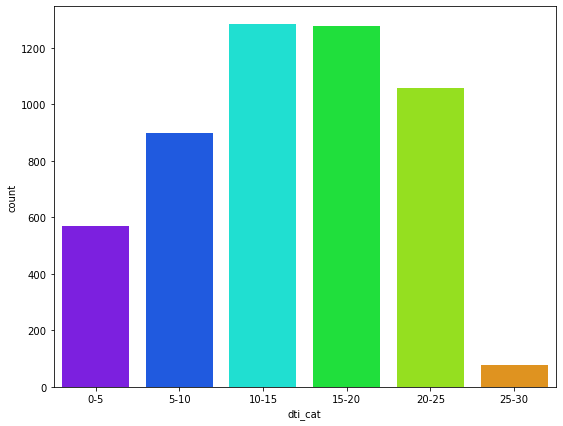

In [69]:
plt.figure(figsize=[9,7])
sns.countplot(x = 'dti_cat', data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> When funded amount by investor is between 5000-10000 most defaulters are found.  </font>

####  Now Let's analyze the date column 'issue_d'. It would be easy for analyzing if we can fetch the month and year seperately which can give us good insights by visualization

In [70]:
## Extracting month and year
data['issue_month'] = data['issue_d'].apply(lambda x : x.split("-")[0] )                        
data['issue_year']='20' + data['issue_d'].apply(lambda x : x.split("-")[1] ) 

In [71]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,funded_amnt_inv_cat,int_rate_cat,open_acc_cat,revol_util_cat,total_acc_cat,annual_inc_cat,installment_cat,dti_cat,issue_month,issue_year
0,5000,4975.0,3 years,10.65,162.87,B,2,10 years,RENT,24000.0,...,5k-10k,10%-15%,0-5,80-100,0-10,3k-31k,145-274,25-30,Dec,2011
1,2500,2500.0,5 years,15.27,59.83,C,4,0,RENT,30000.0,...,0-5k,15%-20%,0-5,0-20,0-10,3k-31k,14-145,0-5,Dec,2011
2,2400,2400.0,3 years,15.96,84.33,C,5,10 years,RENT,12252.0,...,0-5k,15%-20%,0-5,80-100,0-10,3k-31k,14-145,5-10,Dec,2011
3,10000,10000.0,3 years,13.49,339.31,C,1,10 years,RENT,49200.0,...,10k-15k,10%-15%,5-10,20-40,30-40,31k-58k,403-531,20-25,Dec,2011
5,5000,5000.0,3 years,7.90,156.46,A,4,3 years,RENT,36000.0,...,5k-10k,5%-10%,5-10,20-40,10-20,31k-58k,145-274,10-15,Dec,2011


<AxesSubplot:xlabel='issue_month', ylabel='count'>

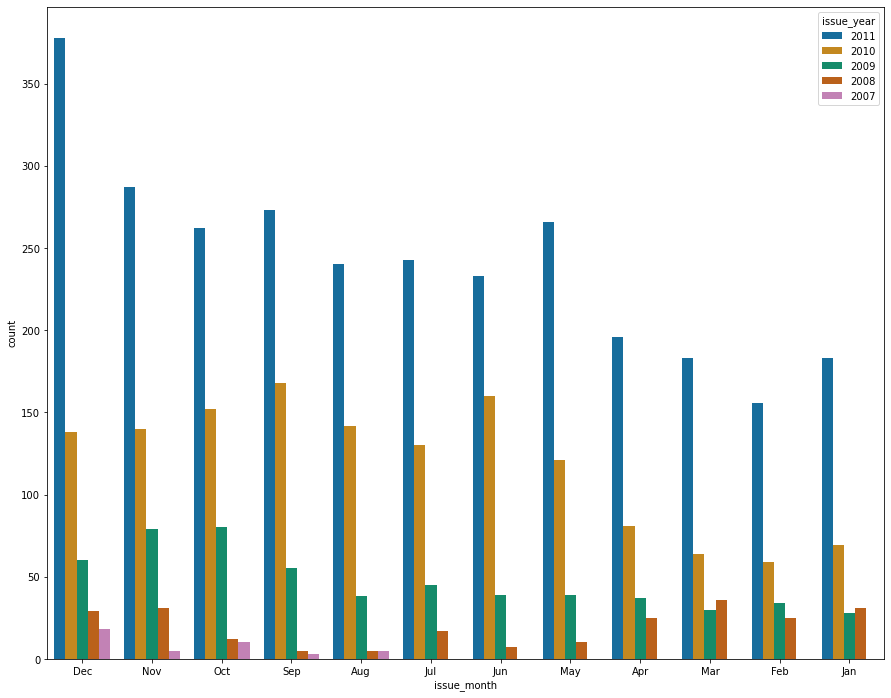

In [72]:
plt.figure(figsize=[15,12])
sns.countplot(x = 'issue_month',hue = 'issue_year',data = data[data['loan_status'] == 'Charged Off'],palette = 'colorblind')

- <font color = blue> Maximum number of defaults occured when the loan was sanctioned or issued in December 2011. </font>

<AxesSubplot:xlabel='issue_year', ylabel='count'>

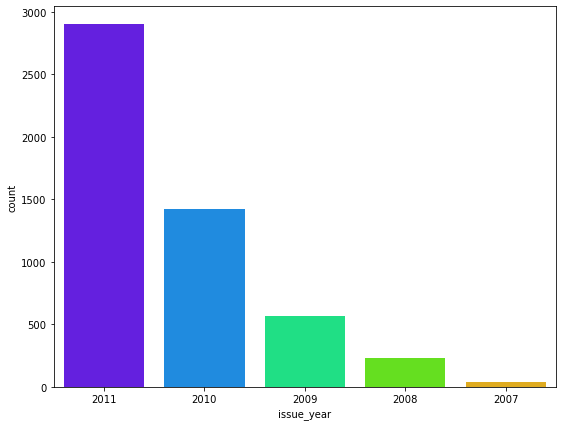

In [73]:
plt.figure(figsize=[9,7])
sns.countplot(x = 'issue_year',data = data[data['loan_status'] == 'Charged Off'],palette = 'gist_rainbow_r')

- <font color = blue> Also maximum number of defaults occured when Loan issued in the year 2011 compared to other years. </font>

## Observations of Univariate Analysis

- Applicants whose term is 3 years or 36 months to be precise are the most defaulters.
- Most of the defaulters are applicants of grade 'B'.
- Most of the defaulters are applicants of sub grade 'B5'.
- Applicants of Employment length 10 or more years are the most in defaulters.
- Applicants staying in Rented(RENT) houses are the most in defaulters.
- Applicants who are 'Not verified' are the most in defaulters.
- Applicants who's purpose of taking the loan is 'debt consolidation' are the most in defaulters.
- Applicants who's number of inquiries is 0 are the most in defaulters.
- Applicants who's number of public records are 0 are the most in defaulters.
- Applicants who are from state 'CA' are the most in defaulters.
- Applicants who's loan amount is between 5000-10000 are most in defaulters.
- When funded amount by investor is between 5000-10000 most defaulters are found.
- When interest rate is between 10-15% most defaulters are found.
- When number of open credit lines in the borrower's credit file is between 5-10 most defaulters are found.
- When Revolving line utilization rate is between 60-80 most defaulters are found.
- When total number of credit lines is between 10-20 most defaulters are found.
- When annual income of applicants are between 31000-58000 most defaulters are found.
- When installments are between 145-274 most defaulters are found.
- When funded amount by investor is between 5000-10000 most defaulters are found.
- Maximum number of defaults occured when the loan was sanctioned or issued in December 2011.
- Also maximum number of defaults occured when Loan issued in the year 2011 compared to other years

## Bivariate Analysis

In [75]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,funded_amnt_inv_cat,int_rate_cat,open_acc_cat,revol_util_cat,total_acc_cat,annual_inc_cat,installment_cat,dti_cat,issue_month,issue_year
0,5000,4975.0,3 years,10.65,162.87,B,2,10 years,RENT,24000.0,...,5k-10k,10%-15%,0-5,80-100,0-10,3k-31k,145-274,25-30,Dec,2011
1,2500,2500.0,5 years,15.27,59.83,C,4,0,RENT,30000.0,...,0-5k,15%-20%,0-5,0-20,0-10,3k-31k,14-145,0-5,Dec,2011
2,2400,2400.0,3 years,15.96,84.33,C,5,10 years,RENT,12252.0,...,0-5k,15%-20%,0-5,80-100,0-10,3k-31k,14-145,5-10,Dec,2011
3,10000,10000.0,3 years,13.49,339.31,C,1,10 years,RENT,49200.0,...,10k-15k,10%-15%,5-10,20-40,30-40,31k-58k,403-531,20-25,Dec,2011
5,5000,5000.0,3 years,7.90,156.46,A,4,3 years,RENT,36000.0,...,5k-10k,5%-10%,5-10,20-40,10-20,31k-58k,145-274,10-15,Dec,2011


In [76]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'loan_amnt_cat',
       'funded_amnt_inv_cat', 'int_rate_cat', 'open_acc_cat', 'revol_util_cat',
       'total_acc_cat', 'annual_inc_cat', 'installment_cat', 'dti_cat',
       'issue_month', 'issue_year'],
      dtype='object')

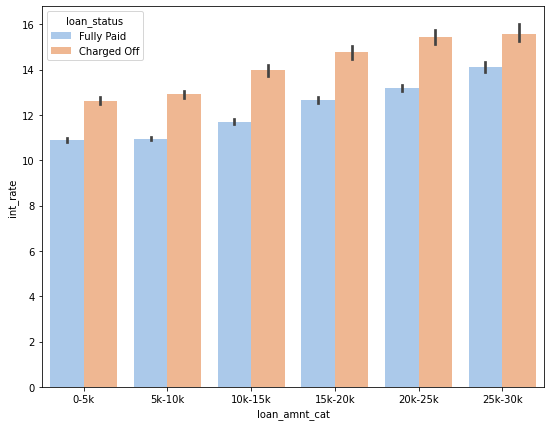

In [197]:
plt.figure(figsize=(9,7))
sns.barplot(data =data,x='loan_amnt_cat', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

- <font color = blue> Applicants with loan amount in range 25k-30k with interest rate of 15-16% are most probable to be defaulters </font>

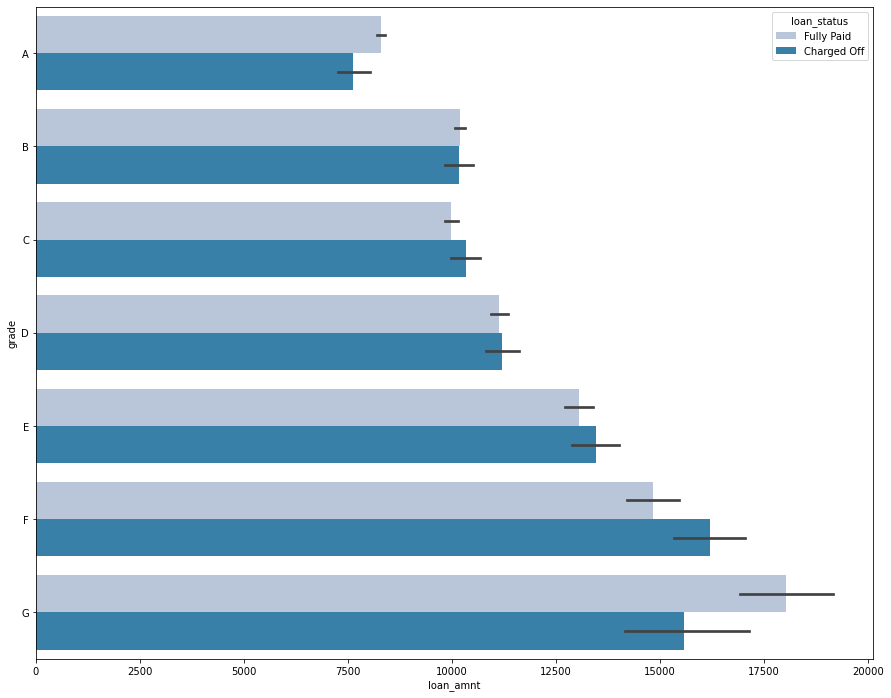

In [118]:
plt.figure(figsize=(15,12))
sns.barplot(data =data,x='loan_amnt', y='grade', hue ='loan_status',palette="PuBu",order=['A','B','C','D','E','F','G'])
plt.show()

- <font color = blue> Applicants with loan amount in range 15k-17.5k of Grade F are most probable to be defaulters </font>

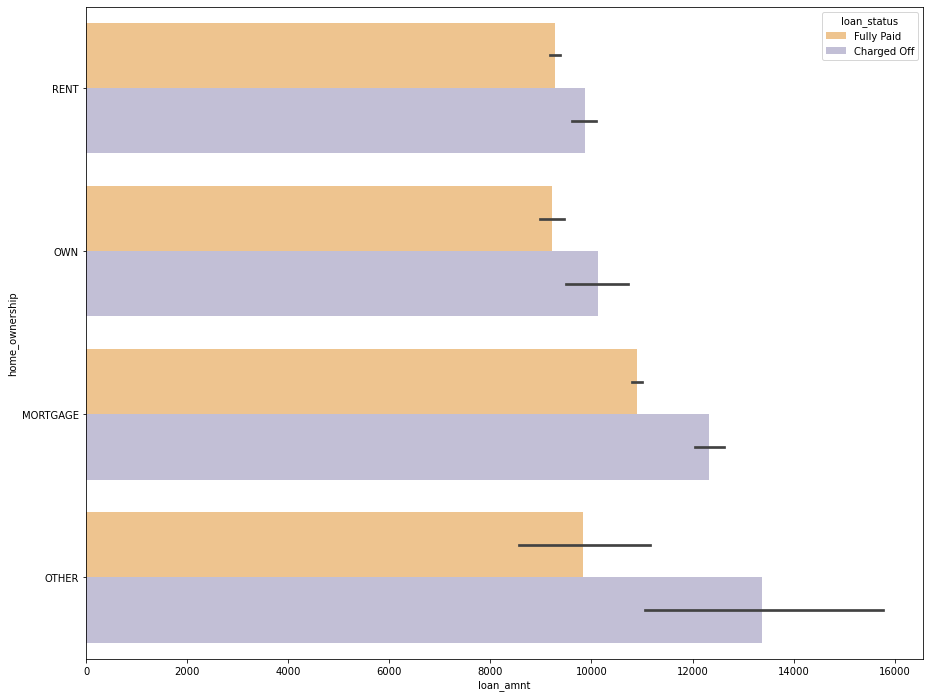

In [122]:
plt.figure(figsize=(15,12))
sns.barplot(data =data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="PuOr")
plt.show()

- <font color = blue> Applicants with loan amount in range 12k-14k and 'OTHER' Home Ownership are most probable to be defaulters </font>

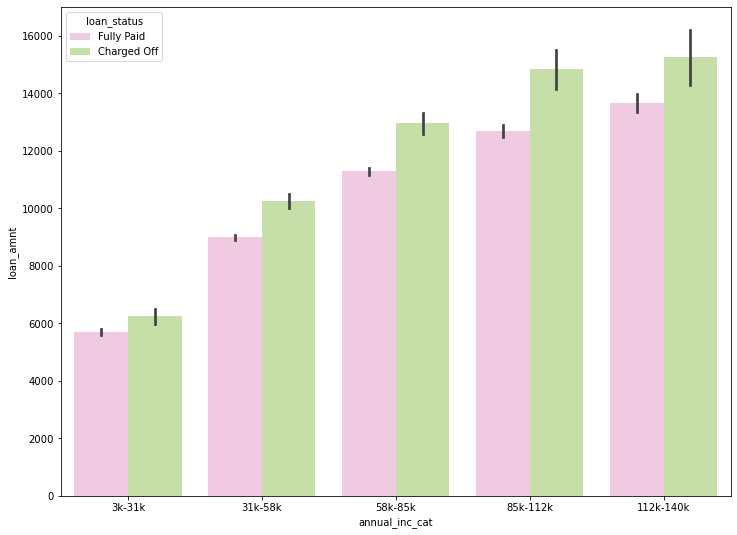

In [130]:
plt.figure(figsize=(12,9))
sns.barplot(data =data,x='annual_inc_cat', y='loan_amnt', hue ='loan_status',palette="PiYG")
plt.show()

- <font color = blue> Applicants with loan amount in range 14k-16k with Annual income from 112k-140k are most probable to be defaulters </font>

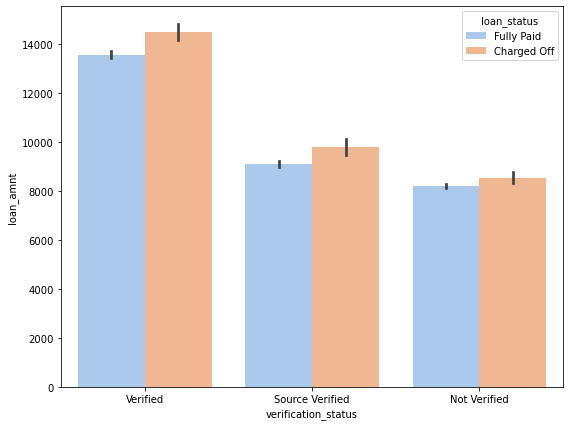

In [200]:
plt.figure(figsize=(9,7))
sns.barplot(data =data,x='verification_status', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()

- <font color = blue> Applicants which are Verified with loan amount in range 14k-16k are most probable to be defaulters\n </font>
- <font color = blue> People with the higher loan amount are being verified first </font>

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

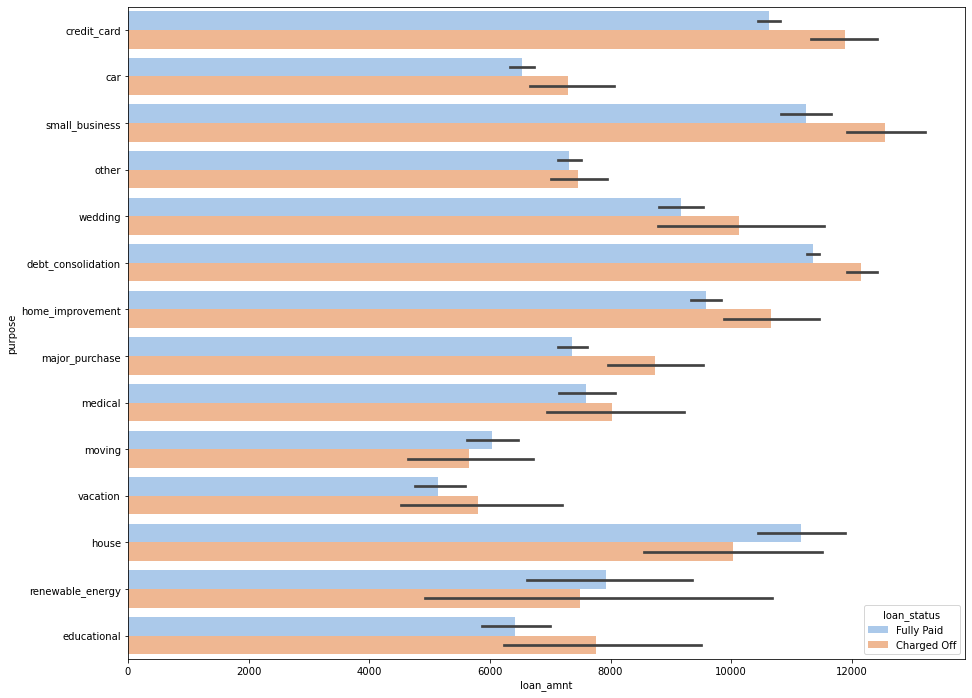

In [154]:
plt.figure(figsize=(15,12))
sns.barplot(data =data,y='purpose', x='loan_amnt', hue ='loan_status',palette="pastel")

- <font color = blue> Applicants who have taken loan for the purpose of small business with loan amount greater than 12k are most probable to be defaulters </font>

<AxesSubplot:xlabel='inq_last_6mths', ylabel='loan_amnt'>

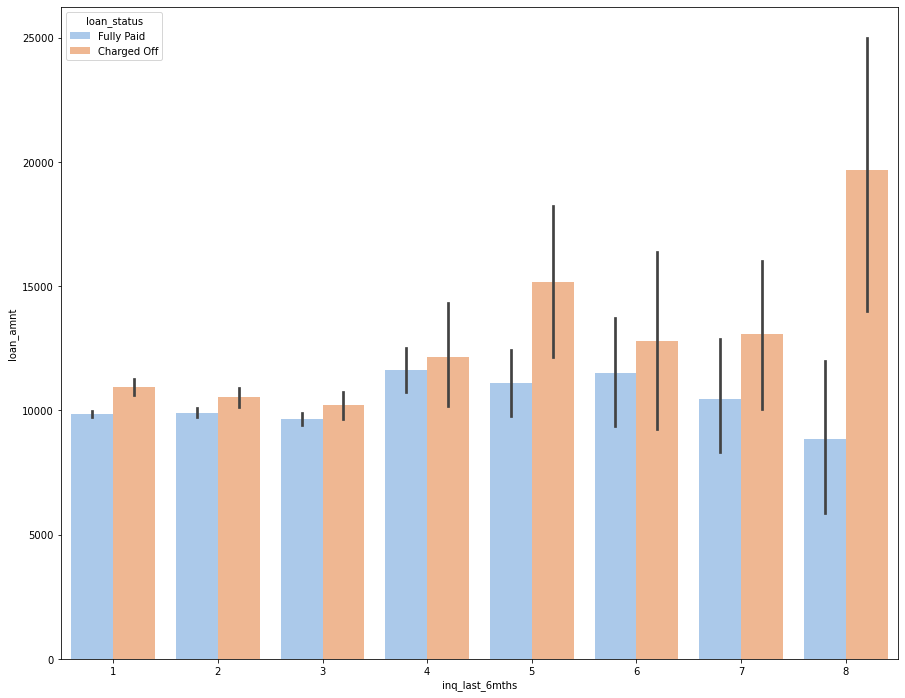

In [161]:
plt.figure(figsize=(15,12))
sns.barplot(data =data,x=data['inq_last_6mths'].apply(lambda x : str(x)), y='loan_amnt', hue ='loan_status',palette="pastel",order=['1','2','3','4','5','6','7','8'])

- <font color = blue> Applicants who have 8 or more enquiries in the last 6 months with loan amount greater than 19k are most probable to be defaulters </font>

<AxesSubplot:xlabel='int_rate_cat', ylabel='annual_inc'>

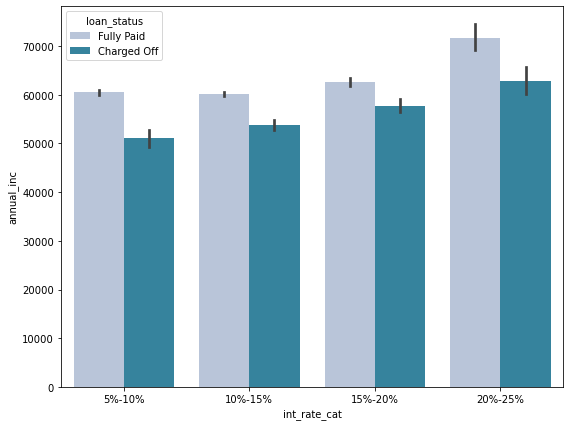

In [198]:
plt.figure(figsize=(9,7))
sns.barplot(data =data,x='int_rate_cat', y='annual_inc', hue ='loan_status',palette="PuBuGn")

- <font color = blue> Applicants with annual income between 60-70k with 20-25% of interest rate on loan are most probable to be defaulters </font>

<AxesSubplot:xlabel='term', ylabel='annual_inc'>

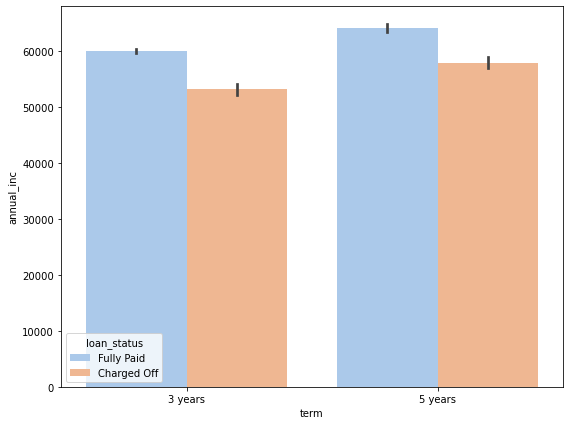

In [166]:
plt.figure(figsize=(9,7))
sns.barplot(data =data,x='term', y='annual_inc', hue ='loan_status',palette="pastel")

- <font color = blue> Applicants with annual income between 50-60k with loan term of 5 years are most probable to be defaulters </font>

<AxesSubplot:xlabel='annual_inc', ylabel='installment_cat'>

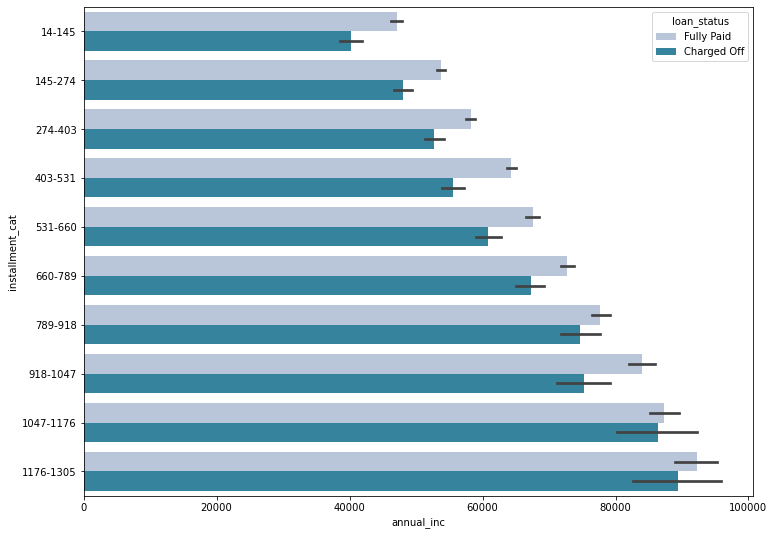

In [169]:
plt.figure(figsize=(12,9))
sns.barplot(data =data,x='annual_inc', y='installment_cat', hue ='loan_status',palette="PuBuGn")

- <font color = blue> Applicants with annual income between 80k-100k with installments between 1176-1305 are most probable to be defaulters </font>

<AxesSubplot:xlabel='annual_inc', ylabel='emp_length'>

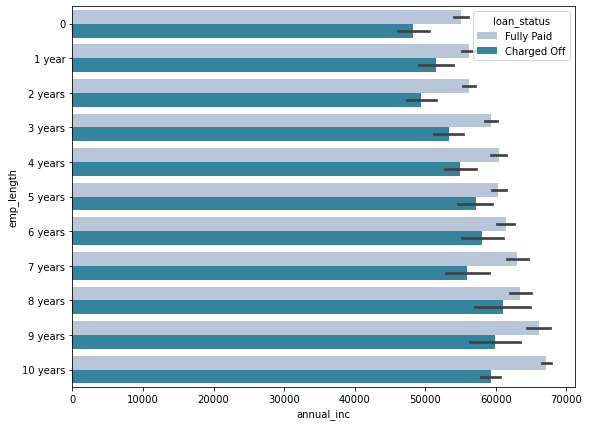

In [172]:
plt.figure(figsize=(9,7))
sns.barplot(data =data,x='annual_inc', y='emp_length', hue ='loan_status',palette="PuBuGn",order=['0','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10 years'])

- <font color = blue> Applicants with annual income between 60k-70k with employment length of 8 years are most probable to be defaulters </font>

<AxesSubplot:xlabel='home_ownership', ylabel='annual_inc'>

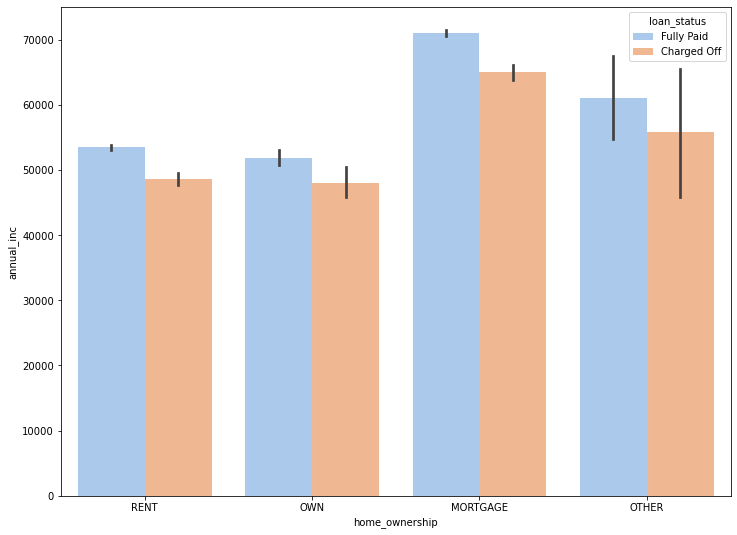

In [174]:
plt.figure(figsize=(12,9))
sns.barplot(data =data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")

- <font color = blue> Applicants with annual income between 60k-70k with home_ownership MORTAGE are most probable to be defaulters </font>

<AxesSubplot:xlabel='annual_inc', ylabel='purpose'>

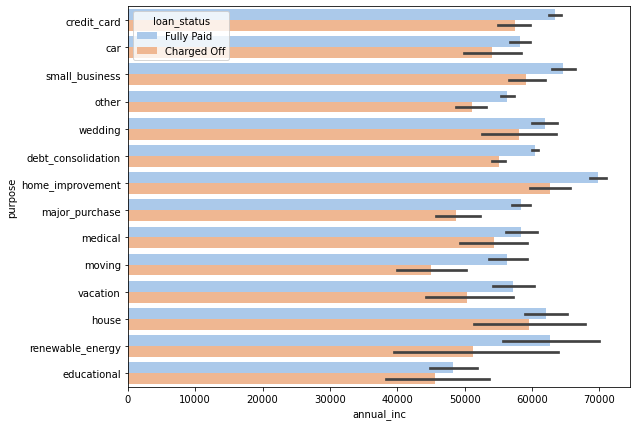

In [199]:
plt.figure(figsize=(9,7))
sns.barplot(data =data,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")

- <font color = blue> Applicants with annual income between 60k-70k with loan purpose of Home Improvement are most probable to be defaulters </font>
- <font color = blue> Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses" </font>

<AxesSubplot:xlabel='annual_inc', ylabel='addr_state'>

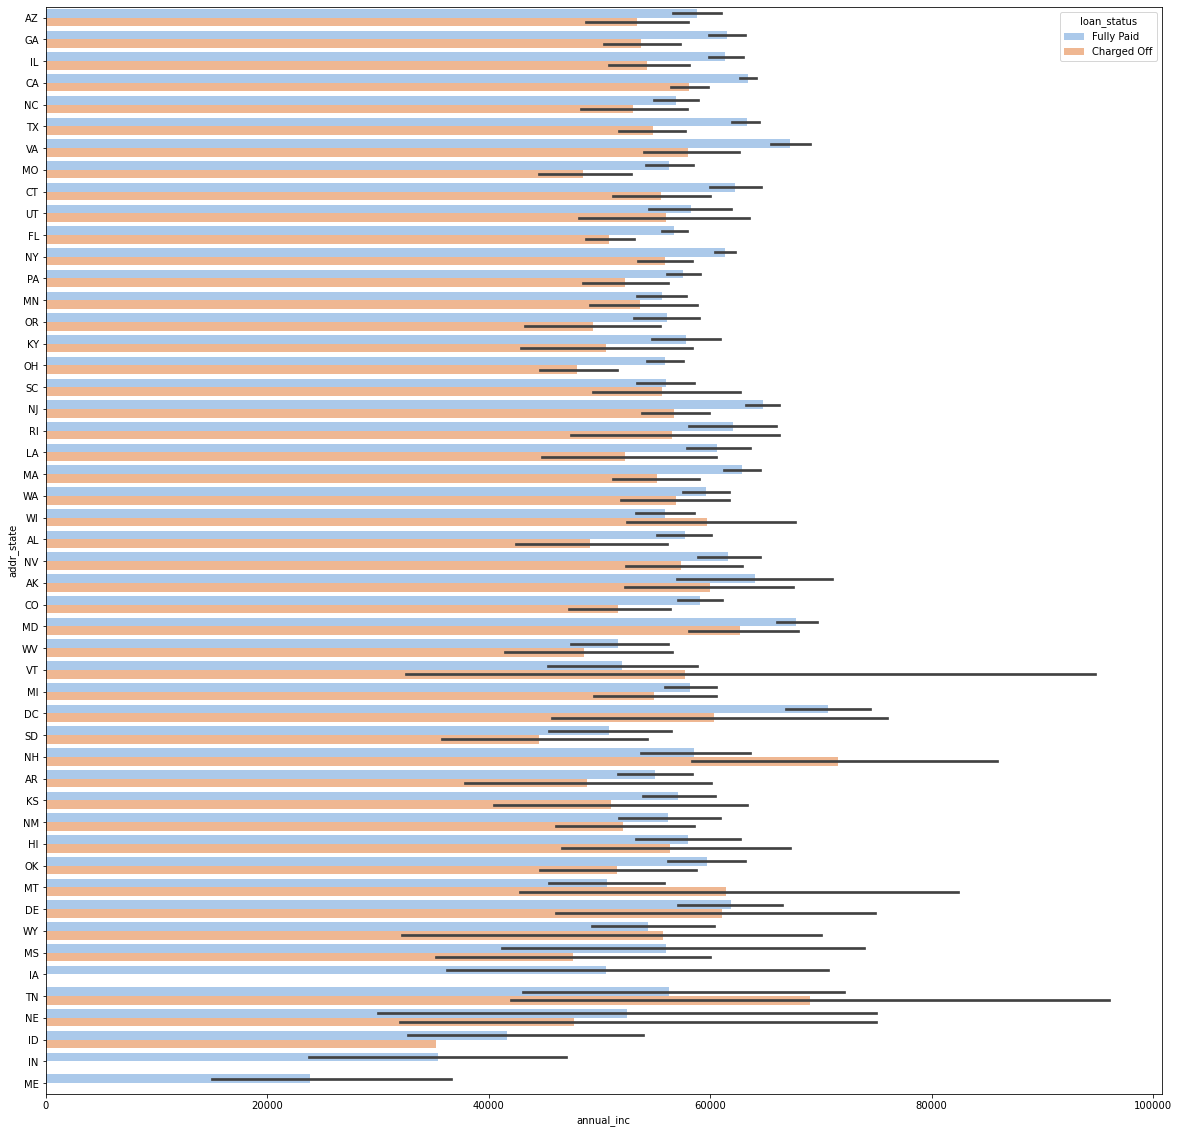

In [177]:
plt.figure(figsize=(20,20))
sns.barplot(data =data,x='annual_inc', y='addr_state', hue ='loan_status',palette="pastel")

- <font color = blue> Applicants with annual income between 60k-80k and from state NH are most probable to be defaulters </font>

<AxesSubplot:xlabel='term', ylabel='int_rate'>

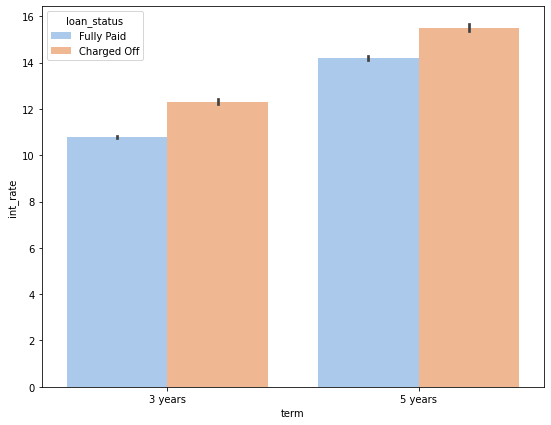

In [180]:
plt.figure(figsize=(9,7))
sns.barplot(data =data,x='term', y='int_rate', hue ='loan_status',palette="pastel")

- <font color = blue> Applicants with loan term of 5 years and interest rate between 14-16% are most probable to be defaulters </font>

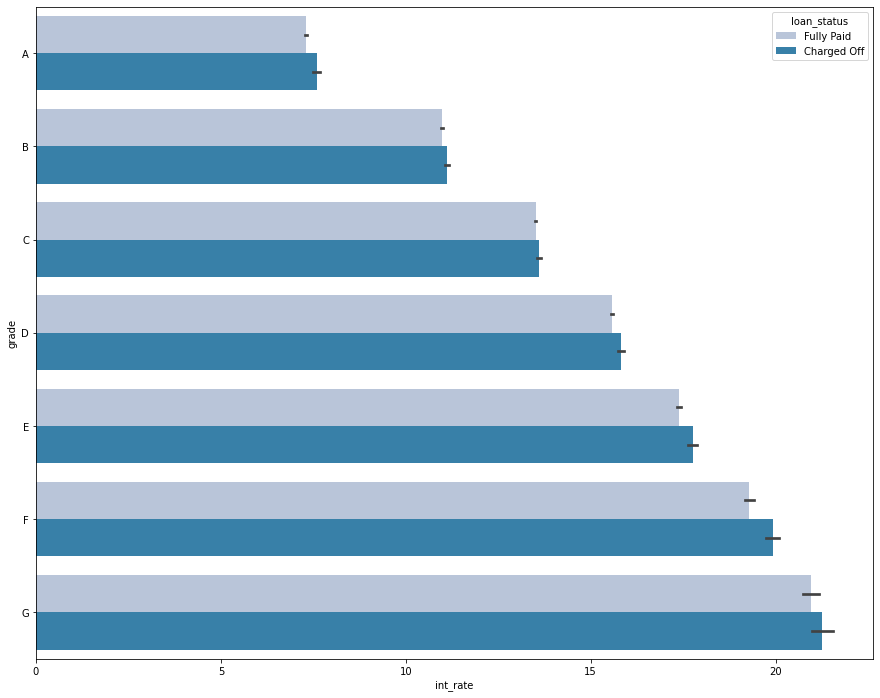

In [181]:
plt.figure(figsize=(15,12))
sns.barplot(data =data,x='int_rate', y='grade', hue ='loan_status',palette="PuBu",order=['A','B','C','D','E','F','G'])
plt.show()

- <font color = blue> Applicants with grade G and interest rate more than 20% are most probable to be defaulters </font>

<Figure size 432x288 with 0 Axes>

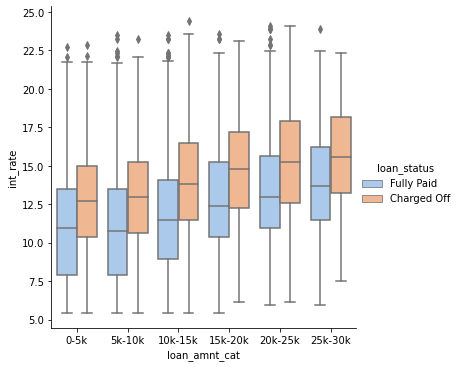

In [183]:
plt.tight_layout()
sns.catplot(data =data,y ='int_rate', x ='loan_amnt_cat', hue ='loan_status',palette="pastel",kind = 'box')

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

## Observations based on analysis with respect to charged off loans

- Applicants with loan amount in range 25k-30k with interest rate of 15-16% are most probable to be defaulters.
- Applicants with loan amount in range 15k-17.5k of Grade F are most probable to be defaulters.
- Applicants with loan amount in range 12k-14k and 'OTHER' Home Ownership are most probable to be defaulters.
- Applicants with loan amount in range 14k-16k with Annual income from 112k-140k are most probable to be defaulters.
- Applicants which are Verified with loan amount in range 14k-16k are most probable to be defaulters.
- Applicants who have taken loan for the purpose of small business with loan amount greater than 12k are most probable to be defaulters.
- Applicants who have 8 or more enquiries in the last 6 months with loan amount greater than 19k are most probable to be defaulters.
- Applicants with annual income between 60-70k with 20-25% of interest rate on loan are most probable to be defaulters.
- Applicants with annual income between 50-60k with loan term of 5 years are most probable to be defaulters.
- Applicants with annual income between 80k-100k with installments between 1176-1305 are most probable to be defaulters.
- Applicants with annual income between 60k-70k with employment length of 8 years are most probable to be defaulters.
- Applicants with annual income between 60k-70k with home_ownership MORTAGE are most probable to be defaulters.
- Applicants with annual income between 60k-70k with loan purpose of Home Improvement are most probable to be defaulters.
- Applicants with annual income between 60k-80k and from state NH are most probable to be defaulters.
- Applicants with loan term of 5 years and interest rate between 14-16% are most probable to be defaulters.
- Applicants with grade G and interest rate more than 20% are most probable to be defaulters